In [2]:
import matplotlib.pyplot as plt
import csv as csv_module


In [3]:
def gather_data(csv_file):
    """method to gather the data"""
    res = []
    with open(csv_file, 'r', encoding="latin-1") as file:
        reader = csv_module.DictReader(file)
        for row in reader:
            res.append(row)
    return res
maha_data = gather_data('Maharashtra.csv')


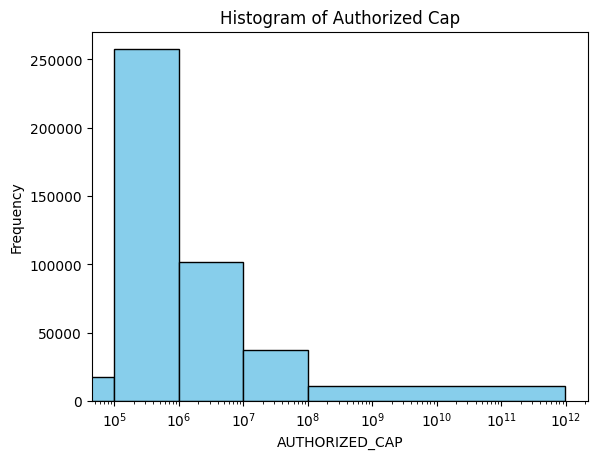

In [106]:
#1
def authorized_cap_data(x):
    res = []
    for row in x:
        m_cap = float(row['AUTHORIZED_CAP'])
        m_cap = int(m_cap)
        res.append(m_cap)
    return res
def histplot(data):

    bins = [0,1e5,1e6,1e7,1e8,max(data)]
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    # plt.xticks(rotation=90)
    plt.xscale('log')
    # plt.xticks(ticks = bins, labels = ['<= 1L', '1L to 10L', '10L to 1Cr', '1Cr to 10Cr', '> 10Cr','l'] , rotation = 90)
    plt.xlabel('AUTHORIZED_CAP')
    plt.ylabel('Frequency')
    plt.title('Histogram of Authorized Cap')
    plt.show()

temp = authorized_cap_data(maha_data)
histplot(temp)

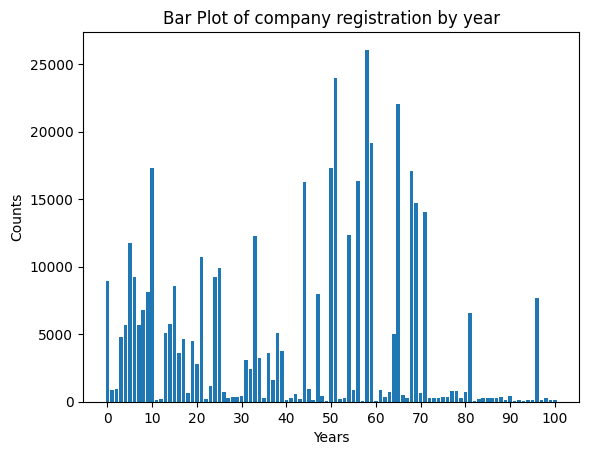

In [126]:
#2
def data_year_company(reader):
    res = {}
    for row in reader:
        year = row['DATE_OF_REGISTRATION']
        year = year[-2:] #taking the last 2 str for year format is in DD-MM-YY
        if year in res:
            res[year] +=1
        else:
            res[year] = 1
    
    return res
def barplot(year_register_dict):
    year_list = year_register_dict.keys()
    registerd_count = year_register_dict.values()
    plt.bar(year_list, registerd_count)
    plt.xlabel("Years")
    plt.ylabel("Counts")
    plt.title("Bar Plot of company registration by year")
    tick_positions = list(range(0, 101, 10))
    tick_labels = tick_positions
    plt.xticks(tick_positions, tick_labels)
    plt.show()
    
temp = data_year_company(maha_data)
barplot(temp)

        

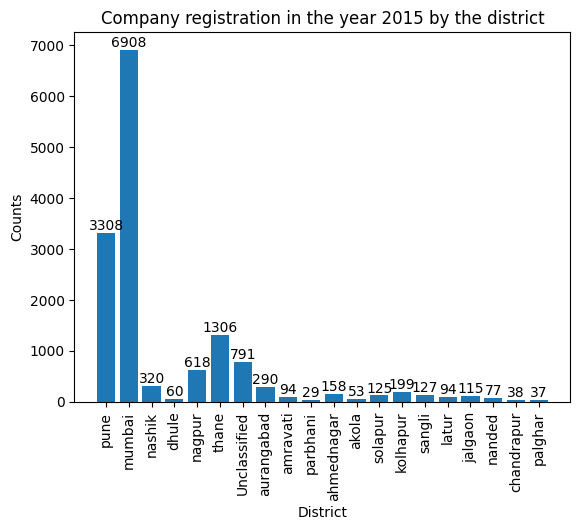

In [170]:
#3
def district_zip_data_fun(csv_file):
    res = {}
    with open(csv_file, 'rt', encoding='utf-8') as file:
        reader = csv_module.DictReader(file)
        for row in reader:
            zipcode = row['Pin_Code']
            district = row['District'].lower()
            res[district] = zipcode
    return res


def find_zip_by_address(words):
    words = words.lower().split(' ')
    for word in words:
        if word in district_zip_data:
            return word
    return 'Unclassified'

def district_reg_2015(reader):
    res = {}
    for row in reader:
        year = row['DATE_OF_REGISTRATION']
        year = year[-2:] #last 2 str for year format is in DD-MM-YY
        if(year == '15'):
            address = row['Registered_Office_Address']
            dis= find_zip_by_address(address)
            if dis in res:
                res[dis] += 1
            else:
                res[dis] = 1
    return res


def barplot_register_2015(res):
    xlist = res.keys()
    ylist = res.values()
    bars = plt.bar(xlist, ylist)
    plt.xlabel("District")
    plt.ylabel("Counts")
    plt.title("Company registration in the year 2015 by the district")
    plt.xticks(rotation = 90)
    plt.bar_label(bars, labels=ylist)
    plt.show()

district_zip_data = district_zip_data_fun('district.csv')
district_reg_2015_dict = district_reg_2015(maha_data)
barplot_register_2015(district_reg_2015_dict)
    
        




[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


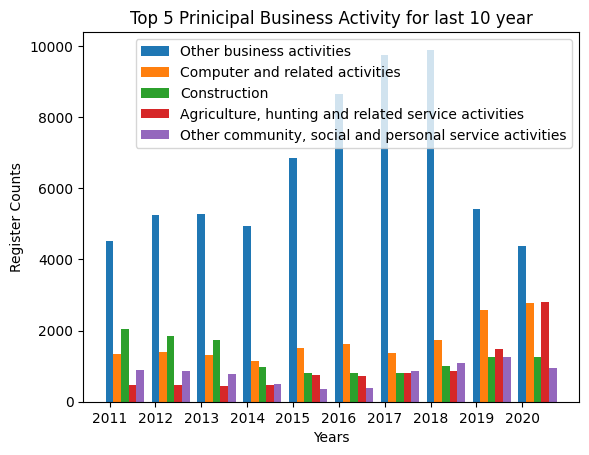

In [112]:
#4
def top5_Business_activity(reader):
    res = {}
    for row in reader:
        year = row['DATE_OF_REGISTRATION']
        year = year[-2:] #last 2 str for year format is in DD-MM-YY 
        #  to check if year is in the right format
        try:  
            int_year = int(year)
        except ValueError:
            continue
        # print(type(int_year))
        business = row['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']
        if 11 <= int_year <21:
            if business in res:
                res[business] +=1
            else:
                res[business] =1
    sorted_res =sorted(res.items(), key=lambda x: x[1], reverse=True)
    top_5 = [item[0] for item in sorted_res[:5]]
    return top_5



def last_10_year_business_activity(top5_activity_data, reader):
    res={}

    for row in reader:
        year = row['DATE_OF_REGISTRATION']
        year = year[-2:] #last 2 str for year format is in DD-MM-YY 
        #  to check if year is in the right format
        try:  
            int_year = int(year)
        except:
            continue

        business = row['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']
        if 11 <= int_year <21 and business in top5_activity_data:
            if int_year in res:
                if business in res[int_year]:
                    res[int_year][business] +=1
                else:
                    res[int_year][business] = 1
            else:
                res[int_year] = {}
                res[int_year][business] = 1
        
    return res

def list_index_dict(top5_activity_data):
    res = {}
    index=0
    for business in top5_activity_data:
        res[business] = index
        index +=1
    return res

def last_10_year_dict():
    res={}
    index=0
    for i in range(11,21):
        res[i] = index
        index+=1
    return res

def group_plot_business_activity(main_data, top5_activity_data):

    # will store the count of business activity in an ordered manner
    group_2d_list = [[0]* 10 for _ in range(5)]

    # it will tell which year belong to which index 0 will be for 2011
    year_index_dict = last_10_year_dict()
    
    # it will tell which business belong to which index 0 will be for others
    business_index_dict = list_index_dict(top5_activity_data)

    for year in main_data:
        year_index = year_index_dict[year]
        for business in main_data[year]:
            business_index = business_index_dict[business]
            register_count = main_data[year][business]
            group_2d_list[business_index][year_index] = register_count 
    
    #group plot
    
    year_list = [2000+i for i in year_index_dict.keys()]
    business_list = [i for i in business_index_dict.keys()]

    width=1/6
    x = list(range(10))
    X=[]
    print(year_list)
    X.append(x)
    for count in range(0,4):
        X.append([i+width for i in X[count]])
        plt.bar(X[count], group_2d_list[count], width, label=business_list[count])
    plt.bar(X[4], group_2d_list[4], width, label=business_list[4])

    
    # Add labels and title
    plt.xlabel('Years')
    plt.ylabel('Register Counts')
    plt.title('Top 5 Prinicipal Business Activity for last 10 year')
    plt.xticks(x, year_list)
    plt.legend()

    plt.show()

top5_activity_data = top5_Business_activity(maha_data)
main_data = last_10_year_business_activity(top5_activity_data, maha_data)
group_plot_business_activity(main_data, top5_activity_data)